In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


dir='/content/drive/My Drive/pets dataset'
categories=['cats','cheetah']

data=[]


for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        nat_img=cv2.imread(imgpath,0)
        try:
            nat_img=cv2.resize(nat_img,(50,50))
            image=np.array(nat_img).flatten()

            data.append([image,label])
        except Exception as e:
            pass



Accuracy: 0.8076923076923077
Prediction: cheetah


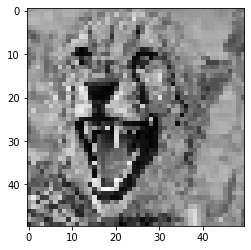

In [9]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,random_state=0)

model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

prediction=model.predict(xtest)
accuracy=model.score(xtest,ytest)
categories=['cats','cheetah']

print('Accuracy:',accuracy)
print('Prediction:',categories[prediction[0]])

mynat=xtest[0].reshape(50,50)
plt.imshow(mynat,cmap='gray')
plt.show()